In [5]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## 1. Data Exploration

In [6]:
base_path = './stock-market/Data/Stocks'
paths = []

for file in glob.glob(base_path + '/*.txt'):
    paths.append(file)

In [7]:
df_list = []
empty_file_symbols = []

count = 0
for path in paths:
    count += 1
    symbol = path.split('/')[-1].split('.')[0]

    # Attempt to read the stock data
    try:
        stock_df = pd.read_csv(path)
        stock_df['Symbol'] = symbol
        df_list.append(stock_df)

    # If stock data is invalid or doens't exist, ignore
    except:
        empty_file_symbols.append(symbol)

df = pd.concat(df_list, ignore_index=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Symbol'] = df['Symbol'].astype('string')

a. Explore the dataset by displaying the first few rows, summary statistics, and data types of each column.

In [8]:
# Display first few rows
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Symbol
0,1999-11-18,30.71,33.75,27.00,29.70,66277506,0,Stocks\a
1,1999-11-19,28.99,29.03,26.87,27.26,16142920,0,Stocks\a
2,1999-11-22,27.89,29.70,27.04,29.70,6970266,0,Stocks\a
3,1999-11-23,28.69,29.45,27.00,27.00,6332082,0,Stocks\a
4,1999-11-24,27.08,28.31,27.00,27.72,5132147,0,Stocks\a


In [9]:
# Summarize statistics
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Date,Open,High,Low,Close,Volume,OpenInt
count,14887665,14887665.00,14887665.00,14887665.00,14887665.00,14887665.00,14887665.00
mean,2010-06-19 22:22:30.382937856,30385.38,31212.47,29361.76,30245.22,1585730.32,0.00
min,1962-01-02 00:00:00,0.00,0.00,-1.00,0.00,0.00,0.00
25%,2007-11-29 00:00:00,7.75,7.88,7.61,7.75,32800.00,0.00
50%,2012-02-17 00:00:00,15.68,15.92,15.43,15.68,192266.00,0.00
75%,2015-05-21 00:00:00,28.90,29.28,28.50,28.90,891786.00,0.00
max,2017-11-10 00:00:00,1423712891.00,1442048636.45,1362117843.98,1437986240.44,2423735131.00,0.00
std,NaN,4202500.95,4323485.55,4046981.00,4180590.07,7635186.71,0.00


In [10]:
# Data types for each column
df.dtypes.to_frame(name='dtype').rename_axis('column').reset_index()

,column,dtype
0,Date,datetime64[ns]
1,Open,float64
2,High,float64
3,Low,float64
4,Close,float64
5,Volume,int64
6,OpenInt,int64
7,Symbol,string[python]


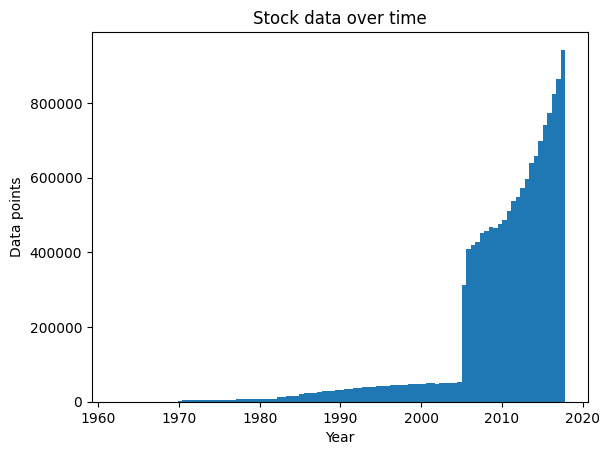

In [11]:
# Number of stock data rows over time
plt.hist(data=df, x='Date', bins=100)
plt.title('Stock data over time')
plt.xlabel('Year')
plt.ylabel('Data points')
plt.show()

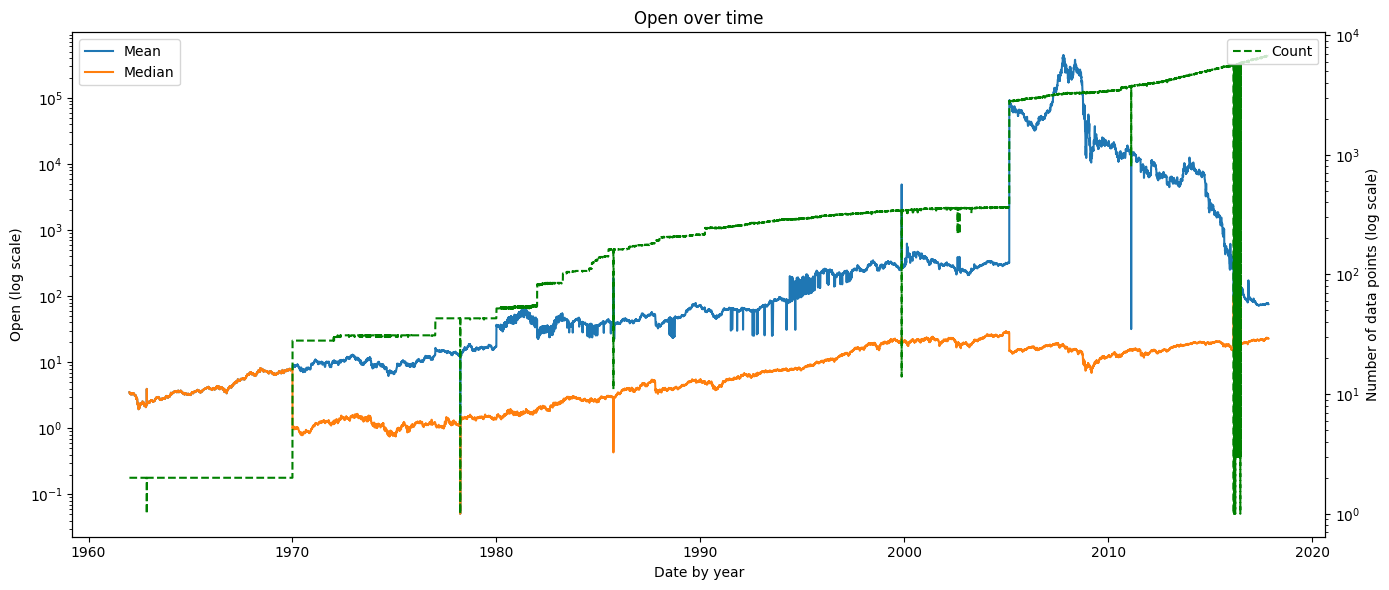

In [12]:
# Mean and median value for columns over time (before forward-filling)
date_data = df.groupby('Date')
dates = list(date_data.indices.keys())

columns = ['Open'] # columns = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in columns:
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(dates, date_data[col].mean(), label="Mean")
    ax1.plot(dates, date_data[col].median(), label="Median")
    ax1.set_xlabel('Date by year')
    ax1.set_ylabel(f'{col} (log scale)')
    ax1.set_yscale('log')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(dates, date_data[col].count(), label='Count', color='green',  linestyle='--')
    ax2.set_ylabel('Number of data points (log scale)')
    ax2.set_yscale("log")
    ax2.legend(loc='upper right')

    plt.title(f'{col} over time')
    plt.tight_layout()
    plt.show()

b. Identify missing values, outliers, and unique values in categorical columns.

In [13]:
# Missing values per column
df.isna().sum().to_frame('missing_values').rename_axis('column').reset_index()

,column,missing_values
0,Date,0
1,Open,0
2,High,0
3,Low,0
4,Close,0
5,Volume,0
6,OpenInt,0
7,Symbol,0


In [14]:
# Number of stocks with no data
print("Number of stocks (symbols) without data:", len(empty_file_symbols))
print("Number of stocks (symbols) with data:", df["Symbol"].nunique())

Number of stocks (symbols) without data: 32
Number of stocks (symbols) with data: 7163


In [15]:
# TODO: Python script that detects missing stock data on empty trading days, excluding weekends and marked holidays

c:\Users\williaht\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)


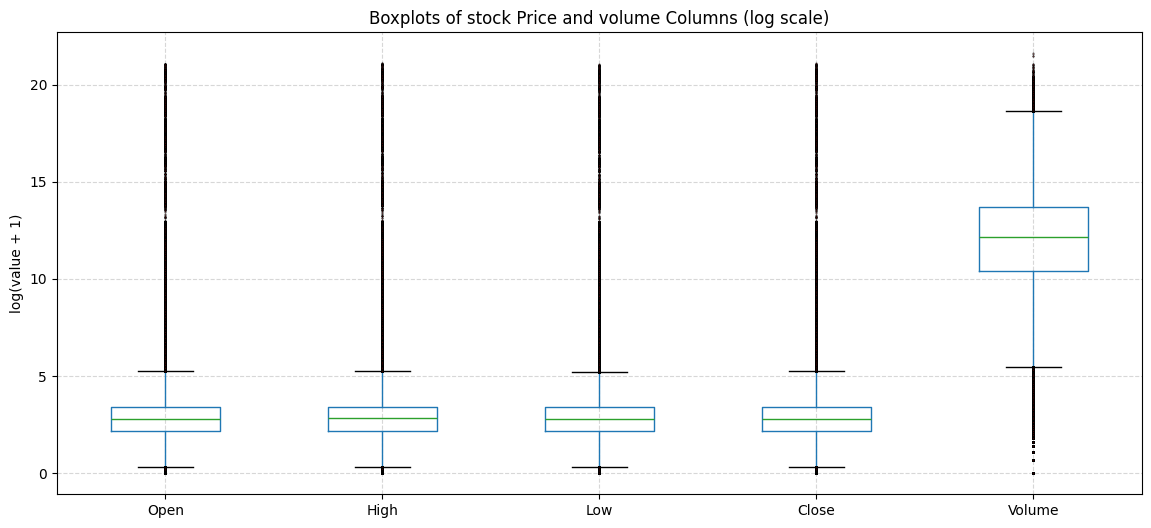

In [21]:
# Outliners with boxplot
columns = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(14, 6))

# Customize outlier appearance with flierprops
flierprops = dict(marker='o', markersize=0.5, markerfacecolor='red', linestyle='none', alpha=0.6)

np.log1p(df[columns]).boxplot(flierprops=flierprops) 
plt.title("Boxplots of stock Price and volume Columns (log scale)")
plt.ylabel("log(value + 1)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [137]:
# Unique values per column
display(df.nunique().to_frame('unique_values').rename_axis('column').reset_index())

,column,unique_values
0,Date,14084
1,Open,302386
2,High,329250
3,Low,329416
4,Close,306846
5,Volume,3478581
6,Symbol,7163


## 2. Data Cleaning

a. Handling Missing Values

b. Choose appropriate methods to handle missing values (e.g., mean/median
imputation for numerical data, mode imputation for categorical data, or deletion of
rows/columns).

In [146]:
# Drop OpenInt column
print('Number of unique values in OpenInt column:', df['OpenInt'].nunique())
df = df.drop(columns=['OpenInt'])
df.head()

Number of unique values in OpenInt column: 1


,Date,Open,High,Low,Close,Volume,Symbol
0,2005-02-25,12.87,12.98,12.83,12.83,15928,iba
1,2005-02-28,13.54,13.54,13.27,13.28,16382,iba
2,2005-03-01,13.19,13.30,13.19,13.30,1250,iba
3,2005-03-02,13.36,13.39,13.27,13.29,8760,iba
4,2005-03-03,13.36,13.40,12.97,13.22,9897,iba


In [147]:
# Make a copy to avoid modifying the original DataFrame
temp_df = df.copy()

# Define key column names
date_col = "Date"
symbol_col = "Symbol"

# Identify which columns should be forward-filled (all except date/symbol)
value_cols = [col for col in temp_df.columns if col not in (date_col, symbol_col)]

# Collect filled data for each symbol
filled_data = []

# Process each symbol separately
for symbol, group in temp_df.groupby(symbol_col, sort=False): # TODO: Import NYSE calendar to ignore markeds holidays
    # Sort chronologically and use date as index
    group = group.sort_values(date_col).set_index(date_col)

    # Create a continuous range of business days (Mon–Fri) for this symbol
    business_days = pd.date_range(start=group.index.min(),
                                  end=group.index.max(),
                                  freq="B")

    # Reindex to include all business days and forward-fill missing values
    group_reindexed = group.reindex(business_days)
    group_reindexed[symbol_col] = symbol
    group_reindexed[value_cols] = group_reindexed[value_cols].ffill()

    # Restore date as a column
    group_reindexed.index.name = date_col
    filled_data.append(group_reindexed.reset_index())

# Combine all symbols and sort by symbol then date
df_filled = (
    pd.concat(filled_data, ignore_index=True)
      .sort_values([symbol_col, date_col], kind="mergesort")
)

df_filled.head()

,Date,Open,High,Low,Close,Volume,Symbol
9829374,1999-11-18,30.71,33.75,27.00,29.70,66277506.00,a
9829375,1999-11-19,28.99,29.03,26.87,27.26,16142920.00,a
9829376,1999-11-22,27.89,29.70,27.04,29.70,6970266.00,a
9829377,1999-11-23,28.69,29.45,27.00,27.00,6332082.00,a
9829378,1999-11-24,27.08,28.31,27.00,27.72,5132147.00,a


In [148]:
df_filled.describe()

,Open,High,Low,Close,Volume
count,15798309.00,15798309.00,15798309.00,15798309.00,15798309.00
mean,29591.90,30393.98,28601.06,29458.86,1537716.22
std,4138964.75,4257643.41,3986287.88,4117609.16,7504489.91
min,0.00,0.00,-1.00,0.00,0.00
25%,7.68,7.81,7.54,7.68,27720.00
50%,15.60,15.83,15.35,15.60,177380.00
75%,28.70,29.06,28.30,28.70,848645.00
max,1423712891.00,1442048636.45,1362117843.98,1437986240.44,2423735131.00


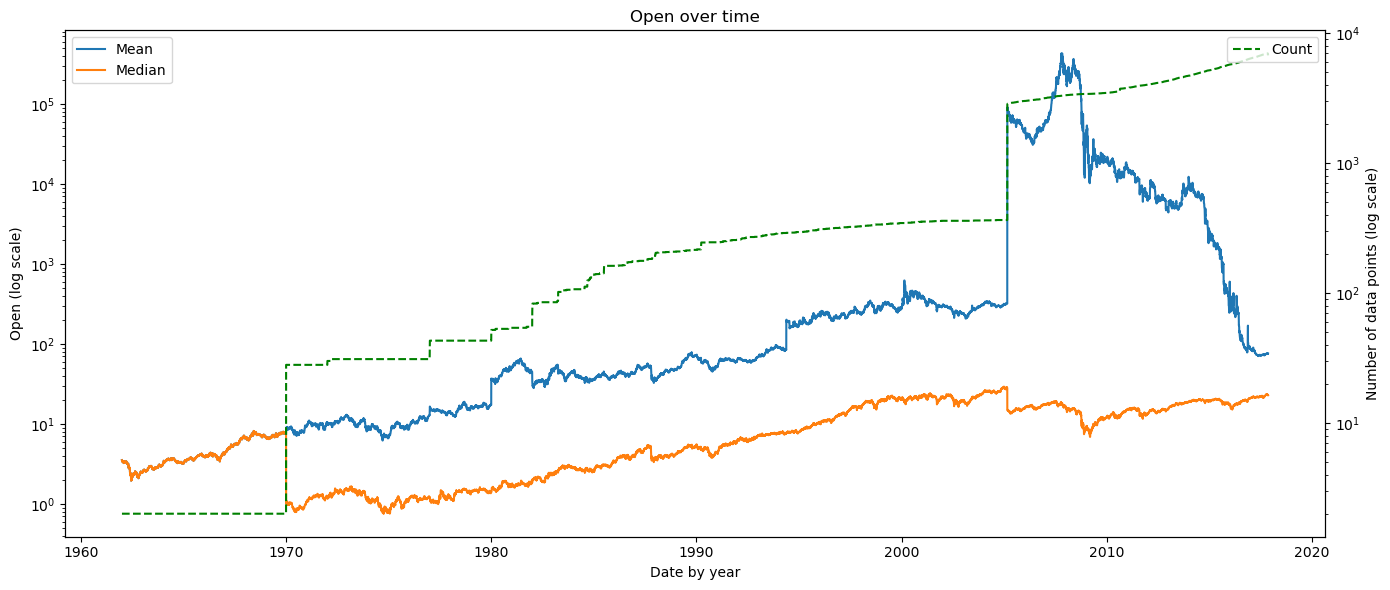

In [149]:
# Mean and median value for columns over time (after forward-filling)
date_data = df_filled.groupby('Date')
dates = list(date_data.indices.keys())

columns = ['Open'] # columns = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in columns:
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(dates, date_data[col].mean(), label="Mean")
    ax1.plot(dates, date_data[col].median(), label="Median")
    ax1.set_xlabel('Date by year')
    ax1.set_ylabel(f'{col} (log scale)')
    ax1.set_yscale('log')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(dates, date_data[col].count(), label='Count', color='green',  linestyle='--')
    ax2.set_ylabel('Number of data points (log scale)')
    ax2.set_yscale("log")
    ax2.legend(loc='upper right')

    plt.title(f'{col} over time')
    plt.tight_layout()
    plt.show()

c. Justify your choices for handling missing data

- Forward-fill missing stock data on empty trading days, excluding weekends and market holidays
- Ignore OpenInt feature as it was consistently set to 0 across all data points
- Exclude companies (files/symbols) with no available data


## 3. Handling outliners

a. Detect outliers using methods such as the IQR method or Z-score.

In [ ]:
df = df[(df['Open'] >= 0)
   & (df['High'] >= 0)
   & (df['Low'] >= 0)
   & (df['Close'] >= 0) 
   & (df['Volume'] >= 0)]

filled_groups = []
df = df.where(df>= 0, np.nan)
for sym, g in df.groupby(symbol_col, sort=False):
    g = g.ffill
    filled_groups.append(g)


df_filled = (
    pd.concat(filled_groups, ignore_index=True)
        .sort_values([symbol_col, date_col], kind="mergesort"))

In [ ]:
import pandas as pd

temp_df = df_filled.copy()  

iqr_outliers = {}
stats_summary = []

# Loop through numeric columns
for col in temp_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = temp_df[col].quantile(0.25)
    Q3 = temp_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (temp_df[col] < lower_bound) | (temp_df[col] > upper_bound)
    outlier_count = outlier_mask.sum()
    total_count = len(temp_df[col])
    outlier_percent = (outlier_count / total_count) * 100 if total_count > 0 else 0

    iqr_outliers[col] = outlier_mask

    stats_summary.append({
        "Column": col,
        "Outliers": int(outlier_count),
        "Total Values": int(total_count),
        "Outlier %": round(outlier_percent, 2),
        "Average": round(df[col].mean(), 2),
        "Min": round(df[col].min(), 2),
        "Max": round(df[col].max(), 2),
        "Lower Bound": round(lower_bound, 2),
        "Upper Bound": round(upper_bound, 2)
    })

combined_iqr_mask = pd.concat(iqr_outliers.values(), axis=1).any(axis=1)
temp_df_iqr = df[combined_iqr_mask]
summary_iqr = pd.DataFrame(stats_summary).sort_values("Outlier %", ascending=False).reset_index(drop=True)

print(summary_iqr.to_string(index=False))
print(f"\nTotal rows with at least one IQR outlier: {temp_df_iqr.shape[0]}")


📊 IQR-based Outlier Detection:

Column  Outliers  Total Values  Outlier %    Average   Min           Max  Lower Bound  Upper Bound
Volume   2181690      15798309      13.81 1537716.22  0.00 2423735131.00  -1203667.50   2080032.50
  High   1251214      15798309       7.92   30393.98  0.00 1442048636.45       -24.07        60.94
   Low   1250550      15798309       7.92   28601.06 -1.00 1362117843.98       -23.60        59.44
  Open   1249666      15798309       7.91   29591.90  0.00 1423712891.00       -23.84        60.22
 Close   1249967      15798309       7.91   29458.86  0.00 1437986240.44       -23.84        60.22

Total rows with at least one IQR outlier: 3265390


In [159]:
temp_df = df_filled.copy()

zscore_outliers = {}
stats_summary_z = []

for col in temp_df.select_dtypes(include=['float64', 'int64']).columns:
    mean = temp_df[col].mean()
    std = temp_df[col].std()
    if std == 0:
        continue  # skip constant columns

    z_scores = (temp_df[col] - mean) / std
    outlier_mask = np.abs(z_scores) > 3  # threshold = 3 std deviations
    outlier_count = outlier_mask.sum()
    total_count = len(temp_df[col])
    outlier_percent = (outlier_count / total_count) * 100 if total_count > 0 else 0

    zscore_outliers[col] = outlier_mask

    stats_summary_z.append({
        "Column": col,
        "Outliers": int(outlier_count),
        "Total Values": int(total_count),
        "Outlier %": round(outlier_percent, 2),
        "Average": round(mean, 2),
        "Std Dev": round(std, 2),
        "Min": round(df[col].min(), 2),
        "Max": round(df[col].max(), 2)
    })

combined_z_mask = pd.concat(zscore_outliers.values(), axis=1).any(axis=1)
temp_df_z = df[combined_z_mask]
summary_z = pd.DataFrame(stats_summary_z).sort_values("Outlier %", ascending=False).reset_index(drop=True)

print(summary_z.to_string(index=False))
print(f"\nTotal rows with at least one Z-score outlier: {temp_df_z.shape[0]}")


Column  Outliers  Total Values  Outlier %    Average    Std Dev   Min           Max
Volume    139841      15798309       0.89 1537716.22 7504489.91  0.00 2423735131.00
  Open      2557      15798309       0.02   29591.90 4138964.75  0.00 1423712891.00
  High      2558      15798309       0.02   30393.98 4257643.41  0.00 1442048636.45
   Low      2556      15798309       0.02   28601.06 3986287.88 -1.00 1362117843.98
 Close      2558      15798309       0.02   29458.86 4117609.16  0.00 1437986240.44

Total rows with at least one Z-score outlier: 142400


b. Decide whether to remove, cap, or transform the outliers. Justify your decisions.

## 4. Data Transformation

a. Encoding Categorical Data

i. Apply label encoding or one-hot encoding to transform categorical data into
numerical form.

In [150]:
# Label encoding for symbol feature
df_encoded = df_filled.copy() # TODO: Replace with correct df after handling outliners
label_encoder = LabelEncoder()
df_encoded["Symbol"] = label_encoder.fit_transform(df_encoded["Symbol"])
df_encoded.describe()

,Open,High,Low,Close,Volume,Symbol
count,15798309.00,15798309.00,15798309.00,15798309.00,15798309.00,15798309.00
mean,29591.90,30393.98,28601.06,29458.86,1537716.22,3544.61
std,4138964.75,4257643.41,3986287.88,4117609.16,7504489.91,2080.72
min,0.00,0.00,-1.00,0.00,0.00,0.00
25%,7.68,7.81,7.54,7.68,27720.00,1693.00
50%,15.60,15.83,15.35,15.60,177380.00,3576.00
75%,28.70,29.06,28.30,28.70,848645.00,5318.00
max,1423712891.00,1442048636.45,1362117843.98,1437986240.44,2423735131.00,7162.00


ii. Justify your choice of encoding method

- With 7,162 unique companies, one-hot encoding would introduce 7,162 extra features, making the model unnecessarily complex. Label encoding is more suitable in this case

b. Feature Scaling

i. Apply feature scaling techniques such as normalization (Min-Max scaling) or standardization (Z-score normalization) to the dataset.

ii. Explain why feature scaling is necessary and how it impacts the model.

Feature scaling is important because raw features often have very different ranges, and this can cause models to give more weight to features with larger values. By scaling, we ensure that all features contribute equally, which improves fairness and accuracy.

## 5. Data Splitting

a. Split the preprocessed dataset into training and testing sets. Typically, an 80-20 or 70-30 split is used.

In [153]:
# Split into 80% training and 20% testing
train_df, test_df = train_test_split(df_filled, test_size=0.2, random_state=42)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (12638647, 7)
Testing set shape: (3159662, 7)


b. Explain the importance of splitting the data and how it prevents overfitting.

Splitting the data allows the model to be trained on one set and evaluated on another, ensuring that performance is measured on unseen data. The training set adjusts model parameters, while the test set checks generalization. This prevents overfitting by forcing the model to learn patterns instead of memorizing the training data. A validation set is often used during training to tune hyperparameters and monitor performance.